# Handout #6: Classification with K-Nearest Neighbors



---



---



Content Authors:


*   Chris Malone Ph D, Professor of Data Science and Statistics, Winona State University; Email: cmalone@winona.edu
*   Collin Engstrom PhD, Assistant Professor of Computer Science, Winona State University; Email: collin.engstrom@winona.edu

Content in this handout was adapted from the following sources.
*    https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

* https://scikit-learn.org/1.5/modules/impute.html

* https://github.com/uci-ml-repo/ucimlrepo



---



---



## Libraries and Custom Functions

The following Python libraries will be used throughout this handout.

In [ ]:
# Need to import TensorFlow library
import tensorflow as tf

# Also need Numpy and MatPlot libraries
import numpy as np
import matplotlib.pyplot as plt

# Sci-Kit Learn Libraries
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


# Seaborn - Plotting
import seaborn as sns

# Pandas - Data Management
import pandas as pd

print(tf.__version__)

2.17.1


The following are custom function will be used in this handout.

In [ ]:
# Need a function that plots a confusion matrix for us
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

The **ucimlrepo** package can be used to easily import datasets from the UC Irvine Machine Learning Repository.  Source: [Github](https://github.com/uci-ml-repo/ucimlrepo)

In [ ]:
pip install ucimlrepo



---



---



## Example: Heart Disease

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

Cardiovascular diseases (CVDs) are the number 1 cause of death globally.
 Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains features that can be used to predict presence of heart disease.

The original database contains 76 attributes, but all published experiments refer to using a subset of 14.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4.

<table>
  <tr>
    <td width='100%'>
      <ul>
        <li><strong>Target</strong>: num - indicates presence of heart disease</li><br>
        <ul>
          <li>0 - No presence of heart disease</li>
          <li>1 - Mild or some presence of heart disease</li>
          <li>2 - Moderate presence of heart disease</li>
          <li>3 - Severe presence of heart disease</li>
          <li>4 - Very severe presence of heart disease</li>
        </ul>
        <li><strong>Features</strong>:</li>
        <ul>
          <li>age - age of patient (years)</li>
          <li>sex - sex of patient (0 = Female, 1 = Male)</li>
          <li>cp - chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)</li>
          <li>trestbps - resting blood pressure on admission to the hospital ((mm Hg)</li>
          <li>chol - serum cholestoral (mg/dl)</li>
          <li>fbs - fasting block sugar > 120 mg/dl (0 = false, 1 = true) </li>
          <li>restecg - resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)</li>
          <li>thalach - maximum heart rate achieved</li>
          <li>exang: exercise induced angina (0 = No, 1 = Yes)</li>
          <li>oldpeak - ST depression induced by exercise relative to rest</li>
          <li>slope - the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)</li>
          <li>ca - number of major vessels (0-3) colored by flourosopy</li>
          <li>thal: thalassemia level (3 = normal; 6 = fixed defect; 7 = reversible defect)</li>
        </ul>
    </ul>
    </td>
</tr>
</table>

[Data - Local Copy](https://github.com/christophermalone/mayo_ml_workshop/blob/main/datasets/Heart_Disease.csv)

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1p1lS5NXdNodjo0RD85qaQUFIuqMq61bz" width='30%' height='30%'></img></p>

Image Source: [Link](https://medium.com/analytics-vidhya/heart-disease-prediction-using-knn-algorithm-be78f800e2a9)

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

The following code will read in the Heart Disease dataset directly from the UC Irvine Machine Learning Repository.  This dataset has id=45 on the UCI site.

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch the heart disease dataset from UCI Repo
heart_disease = fetch_ucirepo(id=45)

The following will create a pandas data.frame (i.e. **X**) that contains the 13 features and the second data.frame that contains the target (i.e. y).

In [ ]:
# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

print("The Features matrix:")
print(X)

print("The Target:")
print(y)

The Features matrix:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   



---



---



## Understanding K Nearest Neighbors

K Nearest Neighbor is a machine learning algorithm that classifies a point by identifying the $k$ closest points (i.e. neighbors) and makes a prediction for this point using the most common class among it's neighbors.

### A Simple Example

 For our simple example, let's consider a prediction problem in which the target variable has 3 levels with generic labels <font color="green"><strong>Class A</strong></font>, <font color="red"><strong>Class B</strong></font>, and <font color="black"><strong>Class C</strong></font>. Furthermore, suppose there are only 2 features available for the K Nearest Neighbor algorithm to use when making a prediction for the class.

The K Nearest Neighbor algoritmn has the following steps:


1.   Identify a point for which a predicted class outcome is desired
2.   Compute the distance from this point to all other points
3.   Identify the $k$ nearest neighbors to this point
4.   The predicted outcome for the new point is the the most frequent class within the neighborhood



The algorithm is shown visually through the following graphs.

<p align="center">
<table align="center" bgcolor="white">
  <tr>
    <td align="center" width="50%" bgcolor="white" valign="top"><font size="+2">Plot of Data</font> <br><img src="https://drive.google.com/uc?export=view&id=1PbHErBSMHNe7Qnw85Fr1xgJc-GC1sPO_" width="75%" height="75%"></img>
    </td>
<td align="center" width="50%" bgcolor="white" valign="top"><font size="+2">1. Identify Point</font> <br><img src="https://drive.google.com/uc?export=view&id=1BWbbbzI_jsS7O2LfzBqNBEDpgCgos65J" width="75%" height="75%"></img>
</td>
  </tr>
</table>
</p>


<p align="center">
<table align="center" bgcolor="white">
  <tr>
    <td align="center" width="50%" bgcolor="white" valign="top"><font size="+2">2. Compute Distances</font> <br><img src="https://drive.google.com/uc?export=view&id=1984tY5krpl2NBJn6__0wt5JYPYai8cEs" width="75%" height="75%"></img>
    </td>
<td align="center" width="50%" bgcolor="white" valign="top"><font size="+2">3. k=5 | 4. Prediction:</font> <font size="+2" color="green">Class A</font> <br><img src="https://drive.google.com/uc?export=view&id=1WVwX_-pvkyJhLKEfMErER3nyEI3dxRYO" width="75%" height="75%"></img>
</td>
  </tr>
</table>
</p>

**Comment**: The choice of $k$ may certainly have an impact on the performance of the algorithm.

<p align="center">
<table align="center" bgcolor="white">
  <tr>
    <td align="center" width="50%" bgcolor="white" valign="top"><font size="+2">k=5 --> Prediction:</font> <font size="+2" color="green">Class A</font> <br><img src="https://drive.google.com/uc?export=view&id=1467gI_QaBDW2i2T3RMbnNrvG4tTUEYZa" width="75%" height="75%"></img>
    </td>
<td align="center" width="50%" bgcolor="white" valign="top"><font size="+2">k=10 --> Prediction:</font> <font size="+2" color="red">Class B</font> <br><img src="https://drive.google.com/uc?export=view&id=1XjWMO2Hj0UjeQNLTtxjJKCLfLrQNH-Nz" width="75%" height="75%"></img>
</td>
  </tr>
</table>
</p>


### Distance Considerations

**Minkowski** distance is the default metric used by K Nearest Neighbor classifier in Python. Minkowski distance is a generalization of several well-known distance measures (e.g. Manhattan and Euclidean).

Suppose $x$ and $y$ are two points in a $n$-dimensional space.  The Minkowski Distance between these two points is computed as follows.

$$
D(x,y) = \left( \sum_{i=1}^{n} |x_i - y_i |^p \right)^{\frac{1}{p}}
$$

Let's compute Minkowski's distance for two points from the example above. Suppose two points have been identified as $x = (2,3)$ and $y = (5,7)$.

* Using $p=1$ (Manhattan or City Block)

$$\begin{array}{rcl}
D(x,y) & = & \left( \sum_{i=1}^{n} |x_i - y_i |^1 \right)^{\frac{1}{1}}\\
& = & |2-5| + |3-7|\\
& = & 3 + 4 \\
& = & 7 \end{array}$$

* Using $p=2$ (Euclidean)

$$\begin{array}{rcl}
D(x,y) & = & \left( \sum_{i=1}^{n} |x_i - y_i |^2 \right)^{\frac{1}{2}}\\
& = & \sqrt{(2-5)^2 + (3-7)^2} \\
& = & \sqrt{25} \\
& = & 5 \end{array}$$



A visual depiction of these distances is provided here.

<p align="center">
<table align="center" bgcolor="white">
  <tr>
    <td align="center" width="50%" bgcolor="white" valign="top"><font size="+1">p = 1 (Manhattan)</font><br><img src="https://drive.google.com/uc?export=view&id=1vQ4eCEKwhVhO7Lnr3sXWErOVDUmYC8XW" width="75%" height="75%"></img>
    </td>
<td align="center" width="50%" bgcolor="white" valign="top"><font size="+1">p=2 (Euclidean)</font><br><img src="https://drive.google.com/uc?export=view&id=1-tOgBO9yHT-E4FNZo-eKhOxGkBeLdlss" width="75%" height="75%"></img>
</td>
  </tr>
</table>
</p>



**Comments**:

*  Scaling of the feature variables is **very important**!   

*  Euclidean distance (i.e. $p=2$) is most commonly used

*  A distance is computed for all combination of points

*  Distance measures can be computed on categorical variables through the use of OneHot Encoding

* The $k$ nearest neighbors are the $k$ closest points as determined by these distances



---



---



## Target Variable

The KNN algorithm can be used when the target variable is multilevel The target variable ($num$) for the Heart Disease dataset has with 5 levels (0, and 1-4).

In [ ]:
print(y)

     num
0      0
1      2
2      1
3      0
4      0
..   ...
298    1
299    2
300    3
301    1
302    0

[303 rows x 1 columns]


The following graph provides the distribution of the target variable.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1xPes5UnIWiughTqIbiklUbE443zDHVV2" width='50%' height='50%'></img></p>



---



---



## Balance in the Levels of the Target Variable

The likelihood of **balance** across the levels of the target variable is small when predicting a target with multiple levels.  The optimal situation would have equal representation across the levels of the target variable.



---



---



## Pre-Processing of the Features

Recall the ucimlrepo package allowed us to easily read-in the $ \bf{X}$ matrix directly from the UC Irvine ML repository that contains the available features for the logisitic regression model.

In [ ]:
#Get the number of rows and features
X.shape

(303, 13)

In [ ]:
#Taking a look at the first few rows of the X matrix
X.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


### Imputation

The following snipit of code will allow you to identify which rows are missing for which feature variables.

In [ ]:
X[X.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0


**Imputing the Missing Values of $ca$**

The $ca$ feature is a count of the number of major vessels colored by flourosopy.  The distribution of $ca$ is shown here along with some basic summary statistics.   This distribution is of a count which is discrete, but is indeed numeric.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1Vw4F9yPRkyivy2_B7c5IeJI4zw59BjZr" width='50%' height='50%'></img></p>


The Mean method of imputation will be used for the $ca$ feature. Thus, missing value will be replaced by $0.672$

**Imputing the Missing Values of $thal$**

The $thal$ feature identifies the thalassemia level which has levels 3 = normal, 6 = fixed defect, and 7 = reversible defect.  These measures are *not* naturally numeric - the values simply represent the type of defect.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1v1P8sW7IDTkMcJfgefA3uyq0OrUn2MRE" width='35%' height='35%'></img></p>


The Most Frequent method of imputation will be used for the $thal$ feature.  Thus, missing value will be replaced with $3$ (which represents Normal).

**ColumnTransformer** (part of Sci-Kit Learn) will be used to implement the desired imputation to the $ca$ and $thal$ features.  


In [ ]:
#Create the column tranformer for imputing missing rows
impute_column_tranformer = ColumnTransformer([
                                               ('imp_col1', SimpleImputer(missing_values=np.nan, strategy='mean'), ['ca']),
                                               ('imp_col2', SimpleImputer(missing_values=np.nan, strategy='most_frequent'), ['thal'])
                                             ],
                                             remainder = 'passthrough')



Using the specified column transformer to impute the missing values in the feature data.frame.

In [ ]:
#Impute the missing values of for ca and thal
#Notice: The imputated columns are listed first when returned; thus, rearrangement of col names is necessary
X_Imputed = pd.DataFrame(impute_column_tranformer.fit_transform(X),
                         columns=['ca','thal','age','sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope']
                         )

Taking a look at the rows that had missingness to verify if the imputation methods worked.

In [ ]:
X_Imputed.iloc[[87,166,192,266,287,302]]

,ca,thal,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
87,0.000000,3.0,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0
166,0.672241,3.0,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0
192,0.672241,7.0,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0
266,0.000000,3.0,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0
287,0.672241,7.0,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0
302,0.672241,3.0,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0




---



---



### Scaling the Features - MinMax and OneHotEncode

Let's take a look at the $\bf{X}$ matrix again to understand what features must be scaled.

In [ ]:
X_Imputed.head(10)

,ca,thal,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,0.0,6.0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0
1,3.0,3.0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0
2,2.0,7.0,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0
3,0.0,3.0,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0
4,0.0,3.0,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0
5,0.0,3.0,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0
6,2.0,3.0,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0
7,0.0,3.0,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0
8,1.0,7.0,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0
9,0.0,7.0,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0


The following scaling will be done to the feature matrix $\bf{X}$.

* [Numeric] $ca$ - apply MinMax Scaler
* [Categorical] $thal$ - apply OneHotEncoder (3 levels will result in 2 variables)
* [Numeric] $age$ - apply MinMax Scaler
* [Categorical] $sex$ - none (already binary)
* [Categorical] $cp$ - apply OneHotEncoder (4 levels will result in 3 variables)
* [Numeric] $trestbps$ - apply MinMax Scaler
* [Numeric] $chol$ - apply MinMax Scaler
* [Categorical] $fbs$ - none (already binary)
* [Categorical] $restecg$ - apply OneHotEncoder (3 levels will result in 2 variables)
* [Numeric] $thalach$ - apply MinMax Scaler
* [Categorical] $exang$ - none (already binary)
* [Numeric] $oldpeak$ - apply MinMax Scaler
* [Categorical] $slope$ - apply OneHotEncoder (3 levels will result in 2 variables)

The following specifications for the **scaling** of the features are specified below for the ColumnTransformer.

In [ ]:
#Note: Sex, fbs, and exang will do not need to be OneHotEncoded
transformers_list = [
                      ('encode', OneHotEncoder(dtype='int',drop='first'),['thal', 'cp', 'restecg', 'slope']),
                      ('scale', MinMaxScaler(), ['ca', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
                    ]

column_transformer = ColumnTransformer(transformers_list, remainder = 'passthrough')

The following snipit of code will apply the above columns transformer specifed above the the $\bf{X}_{Imputed}$ feature matrix.  Careful consideration is required when naming each of the columns from this scaling transformation.  The column order is specifed by the order in which the features are listed in the ColumnTransformer above.

In [ ]:
#Apply the desired tranformation to the matrix of features
X_Imputed_Scaled = pd.DataFrame(column_transformer.fit_transform(X_Imputed),
                                columns=['thal_1','thal_2','cp_1', 'cp_2', 'cp_3','restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'ca', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex', 'fbs', 'exang']
                               )

The final feature matrix that will be used to compute the distances for the K Nearest Neighbor algorithm.

In [ ]:
X_Imputed_Scaled.head(10)

,thal_1,thal_2,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.708333,0.481132,0.244292,0.603053,0.370968,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,0.791667,0.622642,0.365297,0.282443,0.241935,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.666667,0.791667,0.245283,0.235160,0.442748,0.419355,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.166667,0.339623,0.283105,0.885496,0.564516,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.250000,0.339623,0.178082,0.770992,0.225806,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.666667,0.687500,0.433962,0.324201,0.679389,0.580645,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.583333,0.245283,0.520548,0.702290,0.096774,0.0,0.0,1.0
8,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.333333,0.708333,0.339623,0.292237,0.580153,0.225806,1.0,0.0,0.0
9,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,0.500000,0.433962,0.175799,0.641221,0.500000,1.0,1.0,1.0


The target variable that will be used by the K Nearest Neighbor algorithm when making predictions for the target variable.

In [ ]:
y[0:10]

,num
0,0
1,2
2,1
3,0
4,0
5,0
6,3
7,0
8,2
9,1




---



---



## Split-Sample Validation

A split-sample validation approach will be implemented here when fitting our logistic regression model.  The split-sample will use $80\%$ of the samples for the training set and $20\%$ of the samples for the test set, i.e. a $80:20$ specification.

In [ ]:
# Break into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_Imputed_Scaled,y,
                                   test_size=0.2,
                                   random_state=0,
                                   shuffle=True)

After the OneHot Encoding has been applied to the categorical features, there are a total of $18$ columns in the feature matrix.

In [ ]:
# determine the number of input features
n_features = X_train.shape[1]
print(n_features)

18




---



---



## Fitting the KNN Classifier

The **KNeighborsClassifier** fom the sklearn.neighbors package will be used here to obtain predictions for the multiclass target variable. The following specificiations will be used for our K Nearest Neighbors classifer.

* n_neighbors = 10 // ($k$=10) specifies the number of neighbors to include when making a prediction

* metric = 'minkowski' // use Minkowski distance

* p = 2 // $p=2$ will be used when computing Minkowski's distance

Source: [Scikit Learn for KNN Classifier](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
# Provide specifications for KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=20,
                                 metric='minkowski',
                                 p=2
                                 )

Next, fitting the logistic regression model to our training set.

In [ ]:
#Fitting the K Nearest Neigbor model
#Note:  the ravel() method converts flattens the array -- simply preventing a warning from being thrown

knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=20)

Recall, the .predict\_proba() function will return the predicted probabilities for the target variable.  

In [ ]:
# Get predictions for the binary target variable
y_pred_allprobs = knn_model.predict_proba(X_test)

print(pd.DataFrame(y_pred_allprobs))

       0     1     2     3     4
0   1.00  0.00  0.00  0.00  0.00
1   0.70  0.20  0.10  0.00  0.00
2   0.15  0.25  0.20  0.30  0.10
3   0.55  0.40  0.05  0.00  0.00
4   0.60  0.35  0.05  0.00  0.00
..   ...   ...   ...   ...   ...
56  0.05  0.20  0.20  0.35  0.20
57  0.95  0.05  0.00  0.00  0.00
58  0.95  0.05  0.00  0.00  0.00
59  0.05  0.30  0.30  0.30  0.05
60  1.00  0.00  0.00  0.00  0.00

[61 rows x 5 columns]


**Comment**: Make note of the discreteness in the predicted probabilites for each level.  For example, if $k=5$, the possible outcomes for the predicted probabilities include $\frac{0}{5}, \frac{1}{5}, \frac{2}{5}, \frac{3}{5}, \frac{4}{5}, \mbox{and} \frac{5}{5}$.

The following snipit of code will obtain the final prediction for the level of the target variable for each observation in the test set.


In [ ]:
#Getting the prediction for the level of the target variable
y_pred = knn_model.predict(X_test)

print(pd.DataFrame(y_pred))

    0
0   0
1   0
2   3
3   0
4   0
.. ..
56  3
57  0
58  0
59  1
60  0

[61 rows x 1 columns]




---



---



## Confusion Matrix

The following code can be used to create a confusion matrix. This code uses the custom plot_cm() function provided above.  

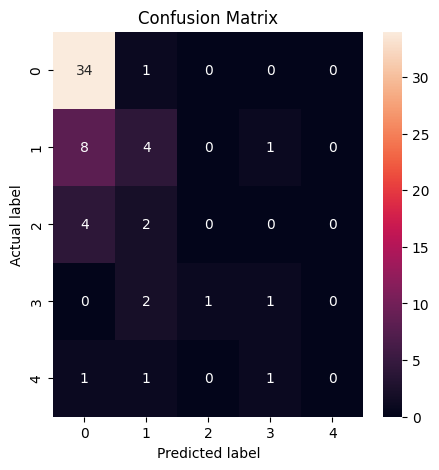

In [ ]:
#Confusion Matrix
plot_cm(y_test, y_pred)

The precision score is a global measure of accuracy for multiclass/multilabel targets. The average = 'micro' specification is required here.

In [ ]:
# evaluate the model
# average the precision over possible categories
prec = precision_score(y_test, y_pred, average='micro')

print('Precision Score: {:.3f}'.format(prec))

Precision Score: 0.639


**Final Comment**: The concept of Variable Importance does not apply to K Nearest Neighbors.  



---



---
End of Document
